<a href="https://colab.research.google.com/github/yanghan8458/practice/blob/main/fac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

<ipython-input-6-abb32f185d70>:44: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(img, 0, 255))


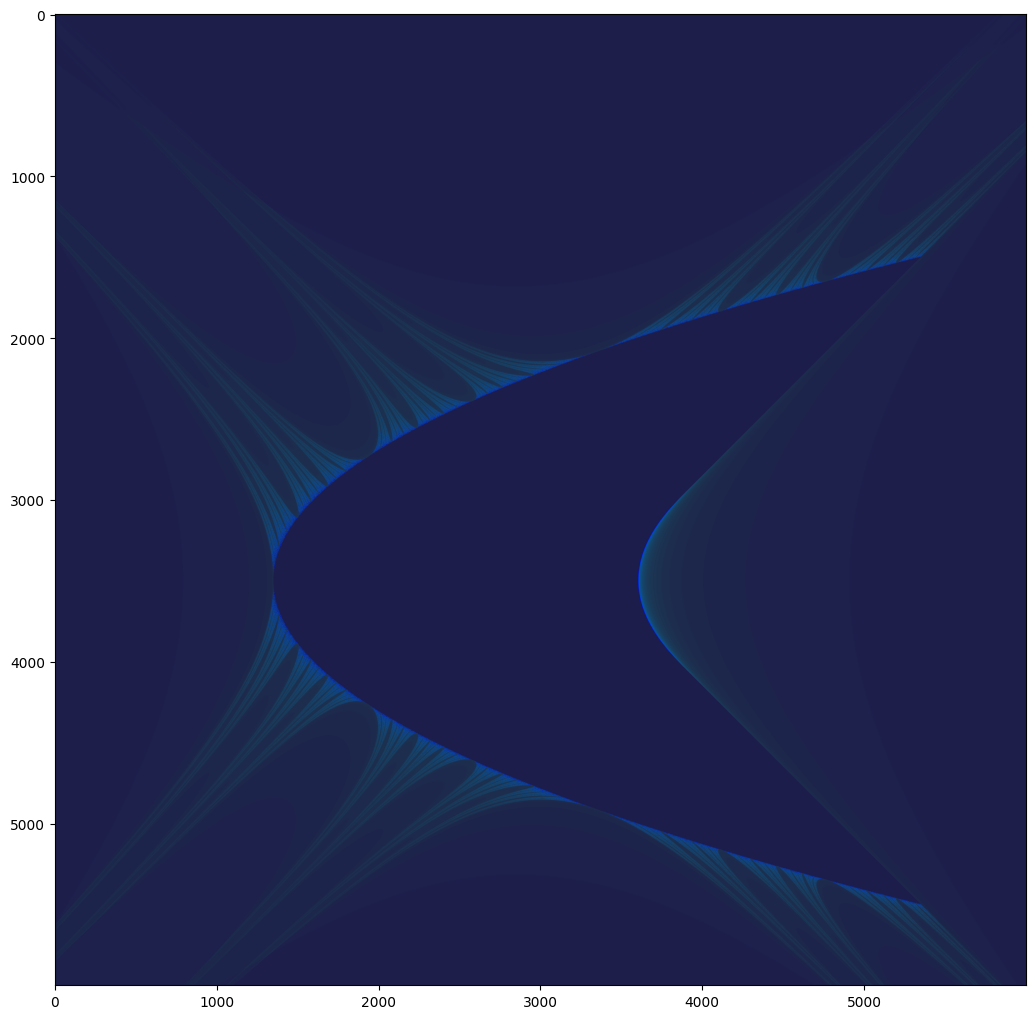

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 设置设备为GPU（如果可用），否则为CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 定义放大区域并设置更高的分辨率
zoom_center_x, zoom_center_y = -0.35, -0.5
zoom_width, zoom_height = 3.0, 3.0
spacing = 0.001

# 生成复数网格
Y, X = np.mgrid[zoom_center_y - zoom_height:zoom_center_y + zoom_height:spacing,
                zoom_center_x - zoom_width:zoom_center_x + zoom_width:spacing]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)

# 克隆复数网格并初始化迭代计数张量
zs = z.clone()
ns = torch.zeros_like(z)

# 将张量传输到选择的设备
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# Burning Ship 分形计算
max_iter = 100
for i in range(max_iter):
    zs_real = torch.abs(zs.real)
    zs_imag = torch.abs(zs.imag)
    zs = zs_real * zs_real - zs_imag * zs_imag + z
    not_diverged = torch.abs(zs) < 4
    ns += not_diverged

# 绘制结果
def processFractal(a):
    a_cyclic = (6.28 * a / a.max()).reshape(list(a.shape) + [1])
    img = np.concatenate([10 + 20 * np.cos(a_cyclic),
                          30 + 50 * np.sin(a_cyclic),
                          155 - 80 * np.cos(a_cyclic)], 2)
    a = np.uint8(np.clip(img, 0, 255))
    return a

fig = plt.figure(figsize=(16, 10))
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()


